<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_36_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 36: Central Limit Theorem , Standard Normalisation (or Scaling)(or z-scores)



**Data Description**

The heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:

|Columns|Description|
|-|-|
|age|age in years|
|sex|sex (1 = male; 0 = female)|
|cp|chest pain type (4 values)|
|trestbps|resting blood pressure (in mm Hg on admission to the hospital)|
|chol|serum cholesterol in $\frac{mg}{dl}$|
|fbs|fasting blood sugar > 120 $\frac{mg}{dl}$|
|restecg|resting electrocardiographic results (values 0, 1, 2)|
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no)|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment|
|ca|number of major vessels (0-3) colored by fluoroscopy|
|thal|A blood disorder called thalassemia|
|target|1 = presence of heart disease; 0 = absence of heart disease|

**Source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease




---

#### Activity 1: Loading Data

Load the heart disease dataset.First upload to google collab  by clicking on upload. Here's the dataset link:

/content/heart.csv

In [ ]:
# Import the required modules and load the heart disease dataset. Also, display the first five rows.
# /content/heart.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

Let's first look at the complete information on the `df` DataFrame.

In [ ]:
# Apply the 'info()' function on the 'df' DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8aed3f07d7c8ddee2a51bbaa96683db3d373aab813752f0a15990f6148414b10
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile

In [ ]:
profile.to_file("df.html")

As you can see there are 303 entries for each column and no missing values. For implementing the Central Limit theorem, we need to choose a column having continuous numeric values. So, let's consider `chol` (cholesterol) column and plot its distribution.

---

#### Activity 2: Sampling

**Q: What is sampling?**

Sampling is a process of taking a few data points (or observations) from an entire column. Let's draw a sample of 10 cholesterol values from the `chol` column. For this, you need to use the `sample()` function from the `pandas` module. The source of the sample itself becomes the population. It takes an integer value as input which denotes the number of samples to be drawn.

**Syntax: `sample(n = num_of_samples)`**



In [ ]:
# Draw a sample of 10 cholesterol values from the 'chol' column.
chol_series= df["chol"]
chol_sample = chol_series.sample(n=10)
print(chol_sample.size)
chol_sample.mean()


10


236.4

As you can see, we have taken a sample of 10 random cholesterol values from the `chol` column.

**Q: Why do we need to do sampling?**

Sometimes there is a need to draw some valid conclusions from a large group of individuals or the entire population. Suppose you need to find out the common symptoms found in the patient of heart disease. It may not be feasible or  impossible to examine the symptoms of the entire population. Instead we may examine only a small part or portion of the population known as **sample**. In this way, we can find out what are the common symptoms of heart disease found in patients for the entire population based on the results found in the sample.


**Mean of Samples**

We will draw several random samples and find their means. Then we will plot the means on a histogram. You will see that means of all the samples follow normal distribution. You have seen that it is easy to make probabilistic predictions using the normal distribution.

Let's plot the distribution of the `chol` column.

<ipython-input-10-c26f58ed9e9d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chol_series,bins="sturges")


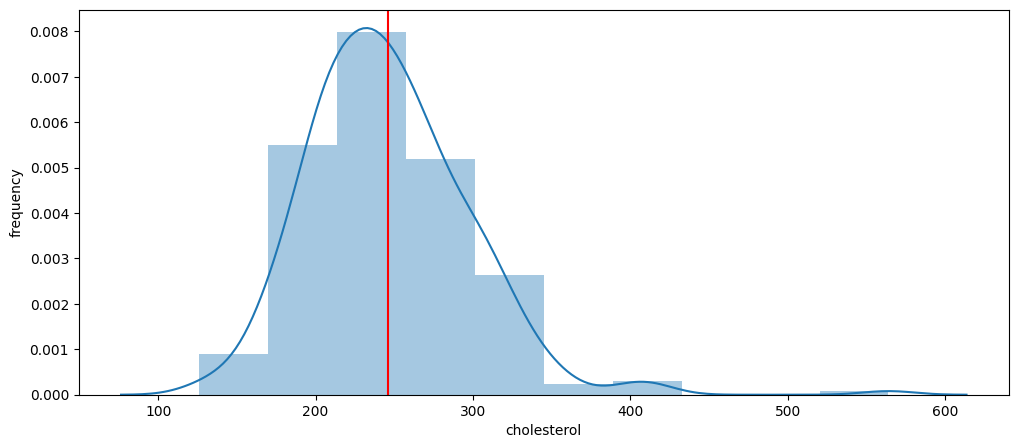

In [ ]:
# Create a histogram for all the observations in the 'chol' column.
plt.figure(figsize=(12,5))
sns.distplot(chol_series,bins="sturges")
plt.xlabel("cholesterol")
plt.ylabel("frequency")
plt.axvline(chol_series.mean(),color = "r")
plt.show()


In [ ]:
chol_series.mean()

246.26402640264027

We can see that the vertical red line which indicates the mean of data is almost at the centre of  distribution. It is not exactly a normal distribution but close to it. The mean of population here is $246.264$ approx. The population mean is denoted as $\mu$. Thus, $\mu = 246.264$



---

#### Activity 3: Distribution of Means of Samples

Let's draw 300 samples from the `chol` columns each having 30 observations from the `chol` column and compute their means. Then let's create a histogram for the means of 300 samples.

In [ ]:
mean_list = []
no_of_samples = 300
for i in range(no_of_samples):
    mean_list.append(chol_series.sample(n = 30).mean())
len(mean_list)

300

In [ ]:
mean_list

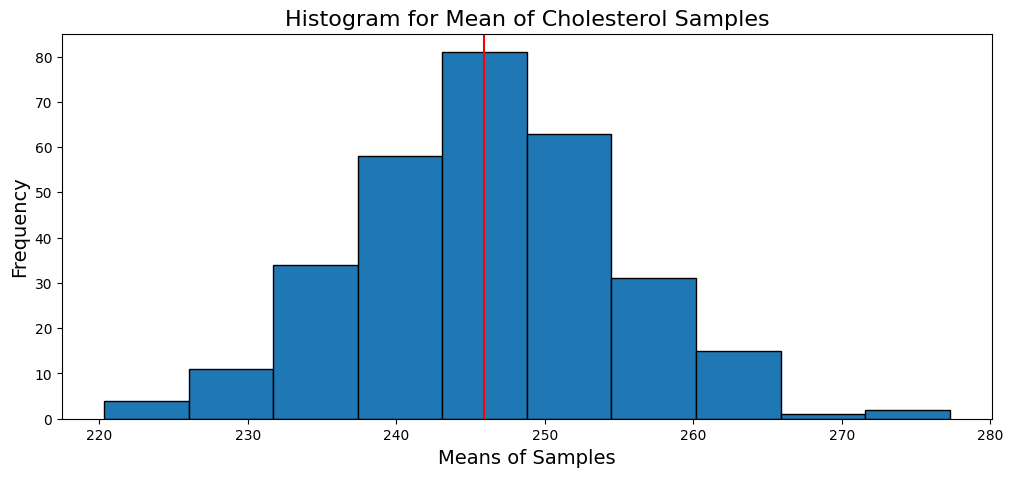

Mean of sample means = 245.915


In [ ]:
# Draw 300 samples from the 'chol' column each having 30 observations, compute their means and create a histogram for the means of samples.
mean_list = []
no_of_samples = 300
for i in range(no_of_samples):
    mean_list.append(chol_series.sample(n = 30).mean())

plt.figure(figsize = (12, 5))
plt.hist(mean_list, bins = 'sturges', edgecolor = 'black')
plt.xlabel('Means of Samples', fontsize = 14) # 'fontsize' attribute sets the desired font size.
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram for Mean of Cholesterol Samples', fontsize = 16)
plt.axvline(x = np.mean(mean_list), color = 'r')
plt.show()
print(f"Mean of sample means = {np.mean(mean_list):.3f}")

In [ ]:
chol_series.mean()

246.26402640264027

In the above code:

1. We created an empty list to store the means of 300 samples.

2. Using the `sample()` function, we took 300 samples from the `chol` column each having 30 different cholesterol observations.

3. Using the `mean()` function, we calculated the mean for each sample containing 30 cholesterol values.

4. Using the `append()` function, we added each sample mean to the `mean_list`
`
5. We created a histogram for all the 300 means of 300 different samples.

6. The mean of all the sample means turn out to be approx 246 which is close to the mean of all the values in the `chol` column. This is very important observation

*If we take several samples of a dataset (or population) such that each sample contains sufficient number of observations, then the means of all the sample means will be very close or nearly equal to the population mean*

This is called **Central Limit Theorem (CLT)**. Also, the means of all the samples follow normal distribution (or bell curve). However, the following two factors must be satisfied:

*   For an accurate normal distribution, the sample sizes should be large.

*   The more closely the original population resembles a normal distribution, less sample size will be required. In our case the original shape of the distribution for the `chol` column was almost normal. Hence the sample size of 30 was good enough. However, if the original population is not normal (may be badly skewed, has multiple peaks, or has many outliers), sample size must be larger than 30.

Let's again take 300 samples and observe the distributions for the means of different samples each having sample sizes $n = 500, 1000, 10000$

**Note:** The `chol` column has exactly 303 values. So, to create a sample of 500 values, we have to provide another input `True` which is a value to the `replace` parameter inside the `sample()` function.

**Syntax:** `sample(n = num_of_samples, replace = True)`

`replace = True` denotes that repeat the values from the `chol` column (population in general).




In [ ]:
chol_series.sample(n = 500,replace = "True")

<ipython-input-18-210fd423c208>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(means_list2, hist = False, bins = 'sturges', label = 'Sample size = 500')
<ipython-input-18-210fd423c208>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(means_list3, hist = False, bins = 'sturg

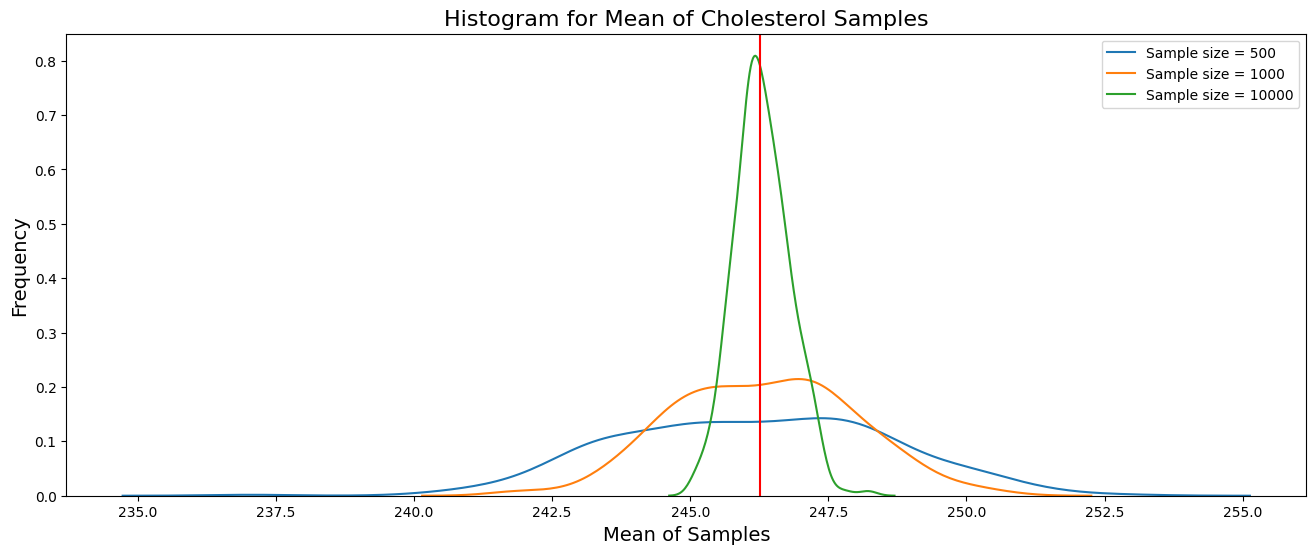

Mean of samples of size 500 = 246.137
Mean of samples of size 1000 = 246.324
Mean of samples of size 10000 = 246.304


In [ ]:
# Create histogram for the means of the samples of the sizes 500, 1000, 10000.

means_list2 = []
means_list3 = []
means_list4 = []

no_of_samples = 300

for i in range(no_of_samples):
    means_list2.append(chol_series.sample(n = 500, replace = True).mean())
    means_list3.append(chol_series.sample(n = 1000, replace = True).mean())
    means_list4.append(chol_series.sample(n = 10000, replace = True).mean())

plt.figure(figsize = (16, 6))
sns.distplot(means_list2, hist = False, bins = 'sturges', label = 'Sample size = 500')
sns.distplot(means_list3, hist = False, bins = 'sturges', label = 'Sample size = 1000')
sns.distplot(means_list4, hist = False, bins = 'sturges', label = 'Sample size = 10000')

plt.axvline(x = chol_series.mean(), color = 'r') #for getting actual population mean

plt.xlabel('Mean of Samples', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram for Mean of Cholesterol Samples', fontsize = 16)
plt.legend()
plt.show()

print(f"Mean of samples of size 500 = {np.mean(means_list2):.3f}")
print(f"Mean of samples of size 1000 = {np.mean(means_list3):.3f}")
print(f"Mean of samples of size 10000 = {np.mean(means_list4):.3f}")

You may notice that as the sample size increases, the distribution of means of all the samples tends to look more and more like a normal distribution and groups more closely around the population mean (shown by the red vertical line).

Try to draw a sample having more than 303 values using the `sample()` function with passing `replace = False` as an input.

**Note:** You should get `ValueError` with the following message:

```
ValueError: Cannot take a larger sample than population when 'replace=False'
```




In [ ]:
#  Draw a sample having more than 303 values using the 'sample()' function with passing replace = False as an input.
chol_samp = chol_series.sample(n = 304, replace = True)
chol_samp

,chol
63,203
163,175
269,283
7,263
158,220
...,...
10,239
289,205
142,209
206,239


Let's see what happens when the sample size of all the samples is very small.


In [ ]:
#Take 300 samples each having 2 observations, calculate their means and create the histogram for means of all the samples.
means_list5 = []
no_of_samples = 300
for i in range(no_of_samples):
    means_list5.append(chol_samp.sample(n = 2).mean())

plt.figure(figsize = (16, 5))
plt.hist(means_list5, bins = 'sturges', edgecolor = "black")
plt.xlabel('Mean of Samples', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram for Mean of Cholesterol Samples', fontsize = 16)
plt.axvline(x = np.mean(means_list5), color = 'r') # for giving mean line
plt.show()
print(f"Mean of sample means: {np.mean(means_list5):.3f}")

Here you can notice that even when the sample size is very small, i.e., $n = 2$, the distribution of the mean of samples is normal. This is because the population (`chol` column ) follows normal distribution approximately.

#### Activity 4: Standard Normalisation (or Scaling)

Now let's learn the concept of standard normalisation which is a normalisation technique to reduce the size of the numeric values. When you normalise an array/series of values using the standard normalisation technique, the mean of all the normalised values will be 0 and the standard deviation will be 1.

Let's normalise all the `chol` values to understand this concept. To do this, you need to calculate  $Z$-score for each value. It is given by the following expression:

$$Z = \frac{X - \mu}{\sigma}$$

where

- $X$ is an observation

- $\mu$ is the population mean

- $\sigma$ is the population standard deviation


In [ ]:
df["target"].value_counts()

,count
target,
1,165
0,138


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Create a Pandas series containing cholesterol values for the patients having heart disease.
chol_having_disease = df.loc[df["target"]==1,"chol"]
chol_having_disease

233

In [ ]:
chol_having_disease[0]

233

In [ ]:
# Calculate the z-score for the first observation in the 'chol_having_disease' Pandas series.

first_z= (chol_having_disease[0]- chol_having_disease.mean())/chol_having_disease.std()
first_z

-0.17235869454549904

Let's create a function to calculate the $Z$-score for each value in the `chol_having_disease` series.

In [ ]:
#  Calculate the Z-score for all the values in the 'chol_having_disease' Pandas series.
def get_zscore(a):
    zscore = (a-np.mean(a))/np.std(a)
    return zscore


In [ ]:
chol_having_disease_zscores = get_zscore(chol_having_disease)
chol_having_disease_zscores.describe()

,chol
count,1.650000e+02
mean,1.789814e-16
std,1.003044e+00
min,-2.176991e+00
25%,-6.411328e-01
50%,-1.541534e-01
75%,4.639359e-01
max,6.026740e+00


In [ ]:
chol_having_disease_zscores

,chol
0,-0.172883
1,0.145526
2,-0.716053
3,-0.116693
4,2.093444
...,...
160,-0.041774
161,1.868684
162,-1.596362
163,-1.259222


Now let's calculate the mean and standard deviation of all the $Z$-scores. The mean value should be 0 and the standard deviation should be 1.

In [ ]:
#  Calculate the mean and standard deviation of all the Z-scores.
chol_having_disease_zscores.mean()

1.7898140881835856e-16

In [ ]:
chol_having_disease_zscores.std()

1.0030441470721063

The process of calculating the $Z$-score for all the observations in an array/series is called **standard normalisation** or **standard scaling**.

*Remember that the mean and standard deviation of the standard normalised values will be always 0 and 1 respectively.*

---

#### Activity 5: Standard Normal Distribution

After normalising the values in an array/series (that follows normal distribution), if you plot it again, you will get a normal distribution as shown in the image below.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/standard-normal-distribution.png' width = 800>

The values on the $x$-axis can be represented with their corresponding $Z$-scores.

In the case of standard normal distribution,

- $\mu = 0$ therefore, $Z = 0$ and

- $\sigma = 1$ therefore, $Z = 1$

So

- $\mu - \sigma = -1 \Rightarrow Z = -1$

- $\mu - 2\sigma = -2 \Rightarrow Z = -2$

- $\mu - 3\sigma = -3 \Rightarrow Z = -3$

- $\mu + \sigma = 1 \Rightarrow Z = 1$

- $\mu + 2\sigma = 2 \Rightarrow Z = 2$

- $\mu + 3\sigma = 3 \Rightarrow Z = 3$




Let's, calculate the $Z$-score for all the values in the `chol_not_having_disease` Pandas series and then plot its probability distribution without histogram.

<ipython-input-32-2fbde9be94c3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chol_having_disease_zscores, hist = False, bins = 'sturges')


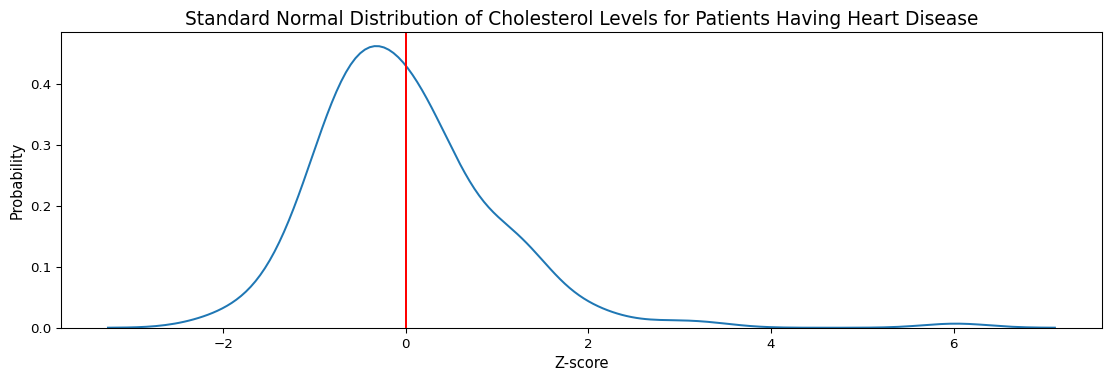

In [ ]:
#  plot  probability distribution for chol_having_disease_zscores

plt.figure(figsize = (14, 4), dpi = 96)
sns.distplot(chol_having_disease_zscores, hist = False, bins = 'sturges')
plt.xlabel('Z-score', fontsize = 11)
plt.ylabel('Probability', fontsize = 11)
plt.title('Standard Normal Distribution of Cholesterol Levels for Patients Having Heart Disease', fontsize = 14)
plt.axvline(x = chol_having_disease_zscores.mean(), color = 'r')
plt.show()

---

####Activity: 6 What is Skewness?

Skewness refers to the asymmetry in the distribution of data. When data is perfectly symmetrical, it forms a normal distribution (or bell curve), where the mean, median, and mode are all the same, and the data is evenly distributed on both sides of the center.

However, in many real-world datasets, the distribution may not be symmetrical. This asymmetry is known as skewness and can be of two types:

**Positive Skewness (Right Skewness):**

- The right tail (higher values) is longer or fatter than the left tail.
- Most data points are concentrated on the left side of the distribution, with a few large values stretching the tail on the right.
- In a positively skewed distribution, the mean is typically greater than the median.

**Negative Skewness (Left Skewness):**

- The left tail (lower values) is longer or fatter than the right tail.
- Most data points are concentrated on the right side of the distribution, with a few small values stretching the tail on the left.
- In a negatively skewed distribution, the mean is typically less than the median.

Understanding skewness is crucial for data analysis because it affects the interpretation of statistical measures like the mean and median, and influences the choice of models and algorithms in data science.



---

In [ ]:
house_price = pd.read_csv("/content/Bengaluru_House_Prices.csv")
house_price

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00
